<p style="font-family: verdana; color: dodgerblue">Привет, Таня! 👋🏻</p>

### A/B - тестирование

### Постановка задачи

Вы — новый аналитик международного интернет-магазина. Ваш предшественник запустил А/B-тест и уволился. Остались только результаты теста, техническое задание и несколько датасетов.

### Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

### Описание данных

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.


Проверьте:

- пересечение тестовой аудитории с конкурирующим тестом,
- совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

Проанализируйте рекомендации, сделанные на основе теста.

### Как сделать задание?

- Опишите цели исследования
- Исследуйте данные:
    - Требуется ли преобразование типов?
    - Опишите природу пропущенных значений и дубликатов, если их обнаружите.
- Проведите исследовательский анализ данных:
    - Как меняется конверсия в воронке на разных этапах?
    - Количество событий на пользователя одинаково распределены в выборках?
    - В выборках встречаются одни и те же пользователи?
    - Как число событий распределено по дням?
    - Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?
- Оцените результаты A/B-тестирования
    - Что можно сказать про результаты A/В-тестирования?
    - Проверьте статистическую разницу долей z-критерием.
- Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования.

### Оглавление: 

1. [Шаг 1. Открываю файлы с данными и изучию общую информацию](#step1)  
2. [Шаг 2. Подготавливаю данные](#step2)  
3. [Шаг 3. Исследовательский анализ данных](#step3)      
4. [Вероятность конверсии при просмотре карточек товаров, просмотра корзины и покупки](#step4) 
5. [Шаг 5. Общий вывод](#step5)

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 1. Открываю файлы с данными и изучию общую информацию</h1><a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


ab_project_marketing_events = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/M2K1c58VRgTAyA')
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<p style="font-family: verdana; color: dodgerblue">Интересное решение - залить csv и скачивать его по прямой ссылке :) </p>

In [2]:
final_ab_events = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/_zatSg82s03IYA')
final_ab_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [3]:
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [4]:
final_ab_events.duplicated().sum()

0

In [5]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [6]:
final_ab_new_users = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/0nUZK_3PJEaoIg')
final_ab_new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [7]:
final_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [8]:
final_ab_new_users.duplicated().sum()

0

In [277]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [278]:
final_ab_participants = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/Npt_rTz9-IUPxA')
final_ab_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [279]:
final_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [280]:
final_ab_participants.duplicated().sum()

0

In [281]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [282]:
final = final_ab_participants.merge(final_ab_new_users.query('region=="EU"'), left_on='user_id', right_on='user_id', how = 'inner', validate = 'm:1')
final

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,DABC14FDDFADD29E,A,interface_eu_test,2020-12-08,EU,Mac
4,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
...,...,...,...,...,...,...
17913,1D302F8688B91781,B,interface_eu_test,2020-12-15,EU,PC
17914,3DE51B726983B657,A,interface_eu_test,2020-12-07,EU,Android
17915,F501F79D332BE86C,A,interface_eu_test,2020-12-17,EU,Mac
17916,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 2. Подготавливаю данные</h1><a id="step2"></a>   
</div>  

#### Проверяем влияют ли другие эксперементы на наш эксприремент

In [283]:
final_ab_test = final
final_ab_test['test_with_group'] = final_ab_test['ab_test'] + ":" + final_ab_test['group']
final_ab_test.groupby('user_id')['test_with_group'].agg(lambda x: ','.join(sorted(set(x)))).reset_index()['test_with_group'].value_counts()

interface_eu_test:A                              5012
interface_eu_test:B                              4953
recommender_system_test:A                        2713
recommender_system_test:B                        2036
interface_eu_test:A,recommender_system_test:A     482
interface_eu_test:B,recommender_system_test:A     439
interface_eu_test:B,recommender_system_test:B     344
interface_eu_test:A,recommender_system_test:B     337
Name: test_with_group, dtype: int64

<p style="font-family: verdana; color: dodgerblue">Прикольное решение, раньше такого не видел!</p>

#### В В-выборки 75% пользователей никуда в другие тесты не попадают, и по 12% пользователей попадают в интерфейсный тест в оби выборки.

#### В A-выборки 75% пользователей никуда в другие тесты не попадают, и по 13% пользователей попадают в одну, и и 12% в другую выборку интерфейсного теста.

#### Из этого делаем вывод, что влияние теста interface_eu_test на обе выборки одинаково.

In [284]:
final_ab = final_ab_participants.query('ab_test=="recommender_system_test"').merge(final_ab_new_users.query('region=="EU"'), left_on='user_id', right_on='user_id', how = 'inner', validate = '1:1')
final_ab

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC
...,...,...,...,...,...,...
6346,7C5C12FA1B5AB710,A,recommender_system_test,2020-12-21,EU,Android
6347,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android
6348,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac
6349,95401934D6D6D4FC,B,recommender_system_test,2020-12-13,EU,iPhone


#### Объединяю данные

In [285]:
final_ab = final_ab.merge(final_ab_events, left_on='user_id', right_on='user_id', how = 'inner', validate = '1:m')
ab = final_ab
ab

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN
...,...,...,...,...,...,...,...,...,...
23415,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,NaN
23416,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,NaN
23417,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,NaN
23418,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,NaN


In [286]:
ab['first_date'] = pd.to_datetime(ab['first_date'])
ab['event_dt'] = pd.to_datetime(ab['event_dt'], format='%Y.%m.%d %H:%M:%S')
ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23420 entries, 0 to 23419
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23420 non-null  object        
 1   group       23420 non-null  object        
 2   ab_test     23420 non-null  object        
 3   first_date  23420 non-null  datetime64[ns]
 4   region      23420 non-null  object        
 5   device      23420 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.8+ MB


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 3. Исследовательский анализ данных</h1> <a id="step3"></a>   
</div>  

In [287]:
min((ab['first_date']))

Timestamp('2020-12-07 00:00:00')

In [288]:
ab.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


In [289]:
ab['device'].value_counts()

Android    10264
PC          6012
iPhone      4881
Mac         2263
Name: device, dtype: int64

<AxesSubplot:title={'center':'Граффик распределения пользователей в группах A и B'}, xlabel='first_date'>

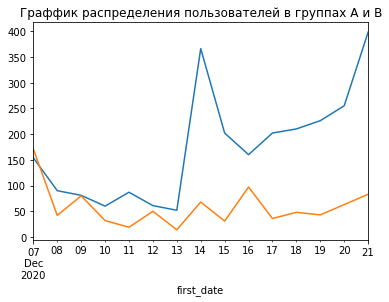

In [290]:
ab.query('group=="A"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="B"').groupby('first_date')['user_id'].nunique().plot(title = 'Граффик распределения пользователей в группах A и B')

#### Граффик распределения пользователей в группах A и B

<AxesSubplot:title={'center':'Граффик распределения пользователей в группах A в зависимости от того, через какое устройство он зашел'}, xlabel='first_date'>

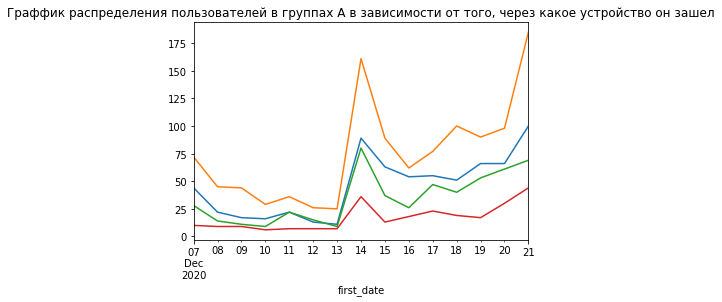

In [291]:
ab.query('group=="A" and device=="PC"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="A" and device=="Android"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="A" and device=="iPhone"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="A" and device=="Mac"').groupby('first_date')['user_id'].nunique().plot(title = 'Граффик распределения пользователей в группах A в зависимости от того, через какое устройство он зашел')

<p style="font-family: verdana; color: orange">Как понять, какой цвет чему соответствует? Пользуйся label="PC", например, в вызовах plot, а потом вызови plt.legend()</p>

#### Граффик распределения пользователей в группах A в зависимости от того, через какое устройство он зашел

<AxesSubplot:title={'center':'Граффик распределения пользователей в группах B в зависимости от того, через какое устройство он зашел'}, xlabel='first_date'>

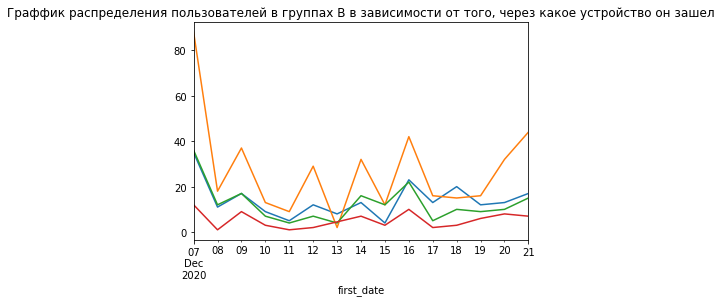

In [292]:
ab.query('group=="B" and device=="PC"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="B" and device=="Android"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="B" and device=="iPhone"').groupby('first_date')['user_id'].nunique().plot()
ab.query('group=="B" and device=="Mac"').groupby('first_date')['user_id'].nunique().plot(title = 'Граффик распределения пользователей в группах B в зависимости от того, через какое устройство он зашел')

#### Граффик распределения пользователей в группах B в зависимости от того, через какое устройство он зашел

In [293]:
ab['first_date'].sort_values(ascending = False )

13943   2020-12-21
12350   2020-12-21
9160    2020-12-21
9161    2020-12-21
9162    2020-12-21
           ...    
16560   2020-12-07
16561   2020-12-07
3846    2020-12-07
3845    2020-12-07
0       2020-12-07
Name: first_date, Length: 23420, dtype: datetime64[ns]

#### В данных по тестах есть данные до 30 декабря включительно. Мы хотим посмотреть пользователей, которые зарегестрированы 14 дней. Поэтому надо удалить пользователей, которые зарегистрировались после 16 декабря. Отсеяли 10272 пользователя.

In [294]:
ab = ab.query('first_date<="2020-12-13"')
ab

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN
...,...,...,...,...,...,...,...,...,...
23403,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-09 10:28:33,product_page,NaN
23404,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-19 21:29:18,product_page,NaN
23405,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-09 10:28:33,login,NaN
23406,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-19 21:29:15,login,NaN


In [295]:
ab.groupby('group').count()

,user_id,ab_test,first_date,region,device,event_dt,event_name,details
group,,,,,,,,
A,3649,3649,3649,3649,3649,3649,3649,401
B,2594,2594,2594,2594,2594,2594,2594,335


#### Посмотрим как  меняется конверсия в воронке на разных этапах

In [296]:
ab.groupby('group')['event_name'].value_counts()

group  event_name  
A      login           1770
       product_page    1024
       product_cart     454
       purchase         401
B      login           1263
       product_page     694
       purchase         335
       product_cart     302
Name: event_name, dtype: int64

In [297]:
ab_A = ab.query('group == "A"')
conversia_A = (ab_A['event_name'].value_counts()).reset_index().T.reset_index()
conversia_A = conversia_A[conversia_A['index'] == 'event_name']
conversia_A['product__page_to_login'] = conversia_A[1]/conversia_A[0]
conversia_A['product_cart_to_login'] = conversia_A[2]/conversia_A[0]
conversia_A['purchase_to_login'] = conversia_A[3]/conversia_A[0]
conversia_A

,index,0,1,2,3,product__page_to_login,product_cart_to_login,purchase_to_login
1,event_name,1770,1024,454,401,0.578531,0.256497,0.226554


In [298]:
ab_B = ab.query('group == "B"')
conversia_B = (ab_B['event_name'].value_counts()).reset_index().T.reset_index()
conversia_B = conversia_B[conversia_B['index'] == 'event_name']
conversia_B['product__page_to_login'] = conversia_B[1]/conversia_B[0]
conversia_B['product_cart_to_login'] = conversia_B[3]/conversia_B[0]
conversia_B['purchase_to_login'] = conversia_B[2]/conversia_B[0]
conversia_B

,index,0,1,2,3,product__page_to_login,product_cart_to_login,purchase_to_login
1,event_name,1263,694,335,302,0.549485,0.239113,0.265241


<div style=" padding: 20px"> <h2 style=" margin-bottom:20px"> Вероятность конверсии при просмотре карточек товаров, просмотра корзины и покупки </h2><a id="step4"></a>   
</div>  

#### Посчитаем вероятность покупки

In [299]:
purchase_to_login = (conversia_B['purchase_to_login']/conversia_A['purchase_to_login'] -1)*100
product_cart_to_login = (conversia_B['product_cart_to_login']/conversia_A['product_cart_to_login'] -1)*100
product__page_to_login = (conversia_B['product__page_to_login']/conversia_A['product__page_to_login'] -1)*100

print('Вероятность покупки _______', purchase_to_login )
print('Вероятность просмотра корзины _______', product_cart_to_login)
print('Вероятность просмотра карточек товаров _______', product__page_to_login)

Вероятность покупки _______ 1    17.0767
Name: purchase_to_login, dtype: object
Вероятность просмотра корзины _______ 1   -6.77744
Name: product_cart_to_login, dtype: object
Вероятность просмотра карточек товаров _______ 1   -5.0206
Name: product__page_to_login, dtype: object


#### Вывод
Покупать стали лучше в группе В.

Вероятность просмотра корзины  и просмотра карточек товаров меньше .Вероятно это связано с тем, что в новой версии есть возможность покупать не переходя на товар

<p style="font-family: verdana; color: dodgerblue">Так и есть</p>

#### Посмотри как количество событий на пользователя распределены в выборках

In [300]:
(ab_A['event_name'].value_counts() / len(ab_A)).reset_index().T.reset_index()

,index,0,1,2,3
0,index,login,product_page,product_cart,purchase
1,event_name,0.485064,0.280625,0.124418,0.109893


In [301]:
ab_B = ab.query('group == "B"')
conversia_B  = (ab_B['event_name'].value_counts() / len(ab_B)).reset_index().T.reset_index()
conversia_B

,index,0,1,2,3
0,index,login,product_page,purchase,product_cart
1,event_name,0.486893,0.26754,0.129144,0.116423


C:\Users\smikl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


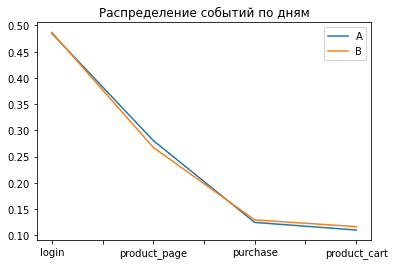

In [302]:
(ab_A['event_name'].value_counts() / len(ab_A)).plot()
(ab_B['event_name'].value_counts() / len(ab_B)).plot()
plt.title('Распределение событий по дням', fontsize = 12)
plt.legend('AB')
plt.show()


#### Посмотрим встречаются одни и те же пользователи в выборках 

In [303]:
ab_product_cart_B = ab.query('event_name=="product_cart"  and group=="B"')
ab_purchase_B = ab.query('event_name=="purchase"  and group=="B"')
ab_product_page_B = ab.query('event_name=="product_page"  and group=="B"')
ab_login_B = ab.query('event_name=="login"  and group=="B"')

In [304]:
ab_product_cart_B['user_id'].isin(ab_purchase_B['user_id']).value_counts()

False    210
True      92
Name: user_id, dtype: int64

In [305]:
ab_purchase_B['user_id'].isin(ab_product_page_B['user_id']).value_counts()

True     212
False    123
Name: user_id, dtype: int64

In [306]:
ab_product_page_B['user_id'].isin(ab_login_B['user_id']).value_counts()

True    694
Name: user_id, dtype: int64

In [307]:
ab_product_cart_A = ab.query('event_name=="product_cart"  and group=="A"')
ab_purchase_A = ab.query('event_name=="purchase"  and group=="A"')
ab_product_page_A = ab.query('event_name=="product_page"  and group=="A"')
ab_login_A = ab.query('event_name=="login"  and group=="A"')

In [308]:
ab_product_cart_A['user_id'].isin(ab_purchase_A['user_id']).value_counts()

False    355
True      99
Name: user_id, dtype: int64

In [309]:
ab_purchase_A['user_id'].isin(ab_product_page_A['user_id']).value_counts()

True     254
False    147
Name: user_id, dtype: int64

In [310]:
ab_product_page_A['user_id'].isin(ab_login_A['user_id']).value_counts()

True    1024
Name: user_id, dtype: int64

In [311]:
ab['weekday'] = ab['event_dt'].dt.day_name()
ab['date'] = ab['event_dt'].dt.round('d')  
ab

<ipython-input-311-00f89bc2d10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['weekday'] = ab['event_dt'].dt.day_name()
<ipython-input-311-00f89bc2d10a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['date'] = ab['event_dt'].dt.round('d')


,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,weekday,date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,Monday,2020-12-08
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,Friday,2020-12-25
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,Monday,2020-12-08
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN,Friday,2020-12-25
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,Monday,2020-12-08
...,...,...,...,...,...,...,...,...,...,...,...
23403,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-09 10:28:33,product_page,NaN,Wednesday,2020-12-09
23404,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-19 21:29:18,product_page,NaN,Saturday,2020-12-20
23405,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-09 10:28:33,login,NaN,Wednesday,2020-12-09
23406,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android,2020-12-19 21:29:15,login,NaN,Saturday,2020-12-20


In [312]:
ab['first_date'].sort_values(ascending = False )

23410   2020-12-13
22550   2020-12-13
14751   2020-12-13
15059   2020-12-13
15060   2020-12-13
           ...    
11786   2020-12-07
11702   2020-12-07
11701   2020-12-07
11700   2020-12-07
0       2020-12-07
Name: first_date, Length: 6243, dtype: datetime64[ns]

In [313]:
ab.groupby(['event_name','group'])['details'].value_counts()

event_name  group  details
purchase    A      4.99       290
                   9.99        56
                   99.99       49
                   499.99       6
            B      4.99       254
                   9.99        52
                   99.99       22
                   499.99       7
Name: details, dtype: int64

<div style=" padding: 20px"> <h2 style=" margin-bottom:20px"> Средний чек и частота покупки в группе </h2><a id="step4"></a>   
</div>  

In [346]:
print('Средний чек в группе А',(ab_A['details'].mean() / len(ab_A)))
print('Средний чек в группе B',(ab_B['details'].mean()  / len(ab_B)))
print('Процент',((ab_B['details'].mean() / len(ab_B))/(ab_A['details'].mean()  / len(ab_A)) -1)*100)

Средний чек в группе А 0.006769859401919925
Средний чек в группе B 0.008615346551743924
Процент 27.26034678505467


In [350]:
print('Частота покупки в группе А',(ab_A['details'].count()  / len(ab_A)).mean())
print('Частота покупки в группе B',(ab_B['details'].count()  / len(ab_B)).mean())
print('Процент',((ab_B['details'].count()  / len(ab_B)).mean()/(ab_A['details'].count()  / len(ab_A)).mean() -1)*100)

Частота покупки в группе А 0.10989312140312414
Частота покупки в группе B 0.12914417887432536
Процент 17.517982222546948


#### Т.е. в группе B и чаще покупают и средний чек больше.

Text(0.5, 0, 'Дата регистрации')

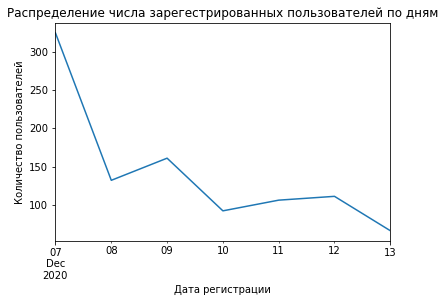

In [316]:
ax = ab.groupby('first_date')['user_id'].nunique().plot(title='Распределение числа зарегестрированных пользователей по дням')
ax.set_ylabel("Количество пользователей")
ax.set_xlabel("Дата регистрации")

Text(0.5, 0, 'Дата')

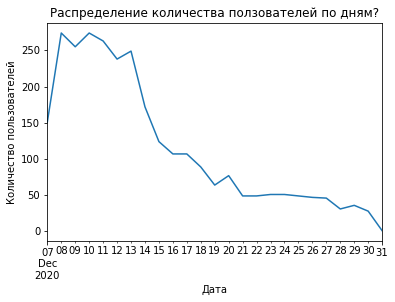

In [317]:
ax = ab.groupby('date')['user_id'].nunique().plot(title="Распределение количества ползователей по дням?")
ax.set_ylabel("Количество пользователей")
ax.set_xlabel("Дата")

In [318]:
tabl = ab.groupby('group')['user_id'].count().reset_index()
tabl

,group,user_id
0,A,3649
1,B,2594


In [319]:
tabl1 = ab.groupby(['group','event_name'])['user_id'].count().reset_index()
tabl1

,group,event_name,user_id
0,A,login,1770
1,A,product_cart,454
2,A,product_page,1024
3,A,purchase,401
4,B,login,1263
5,B,product_cart,302
6,B,product_page,694
7,B,purchase,335



<div style=" padding: 20px"> <h2 style=" margin-bottom:20px"> Оценим результаты A/B-тестирования.
Проверим статистическую разницу долей z-критерием.</h2><a id="step4"></a>   
</div>  

In [320]:
from scipy import stats as st
import numpy as np
import math as mth

alpha = .05 # критический уровень статистической значимости

purchases = np.array([tabl1.at[3,'user_id'], tabl1.at[7,'user_id']])
leads = np.array([tabl[tabl['group'] == 'A']['user_id'].tolist()[0], tabl[tabl['group'] == 'B']['user_id'].tolist()[0]])

# пропорция успехов в первой группе:
p1 = purchases[0]/leads[0]

# пропорция успехов во второй группе:
p2 = purchases[1]/leads[1]
# пропорция успехов в комбинированном датасете:
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
# разница пропорций в датасетах
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)
# ваш код

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.02009951970483259
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Такая разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии. Хотя на первый взгляд, различие кажется небольшим.

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 5. Общий вывод</h1><a id="step5"></a>   
</div>

Итак, я посчитала вероятность конверсии при просмотре карточек товаров 17  - покупать стали лучше.
Вероятность просмотра корзины  -6.8 (вероятно это связано с тем, что в новой версии есть возможность покупать не переходя на товар)
Вероятность покупки  -5 (вероятно это связано с тем, что в новой версии есть возможность покупать не переходя на товар)

<p style="font-family: verdana; color: dodgerblue">17, -6.8, -5 - чего? Процентов? Без обозначения величины не понятно, хорошо это или нет.</p>

Средний чек вырос на 27%. (В группе А 0.0068, в группе 0.0086)

Частота покупки выросла на 17.5%в (В группе А 0.11,в группе B 0.13) 


Я опровергла гипотезу о равенстве средних результатов A/B-тестирования.
Конверсия увеличилась, можно сделать рекомендации,что тест не надо переделать,он был проведен правильно. Его нужно продолжать.

<p style="font-family: verdana; color: orange">Даже при условии, что ты нашла, как разбита аудитория по участиям в разных А/Б-тестах одновременно, ты все равно не исключила interface test из данных. Я это допускаю, это не ошибка, но тест выходит грязным. Плюс в тесте есть влияние маркетинговых акций, проводимых в регионе. Плюс количество участников, - точно ли их было столько, сколько нужно?</p>

<p style="font-family: verdana; color: dodgerblue">Короче говоря, я бы такой тест состоявшимся правильно не назвал бы точно.</p>

<p style="font-family: verdana; color: dodgerblue">Но вообще молодец, много графиков, ты продемонстрировала разносторонний взгляд на исследуемую проблему.</p>